# Ayudantía 10: GMRES

Estudiaremos la convergencia de GMRES!

## GMRES y problema de aproximación asociado

Para el cálculo de valores propios con el algoritmo de Arnoldi, se vió que este se relaciona con el problema de encontrar $p_n\in P^n$, donde $P^n$ son los polinomios de grado $n$ con $c_n=1$ que minimice $\|p_n(A)\|_2$.

### Algunas propiedades de GMRES y sus residuos:

<b>Teorema:</b> Si aplicamos GMRES a $A$ y $b$, entonces las siguientes se cumplen:
- Si escalamos $A$ y $b$ en $\sigma$ ($A, b\to \sigma A, \sigma b$) entonces sus residuos cumplen que $r_n\to \sigma r_n$ para todo $n$.
- Si aplicamos una transformación por matriz unitaria $U$ a $A, b$ ($A\to UAU^*$, $b\to Ub$), entonces $r_n\to U^*r_n$.

Resolver el sistema $Ax=b$ con GMRES se asocia al siguiente problema: Encontrar $p_n\in P_n$ tal que se minimice $\|p_n(A)\|$. Aquí, $P_n$ son los polinomios de grado $\leq n$ con $p(0) = 1$.

Si llamamos $x_n = q_n(A)b$ al punto obtenido en la iteración $n$ de GMRES, donde $q_n$ polinomio de grado $n-1$, entonces el residuo $r_n$ se puede escribir como:

$$r_n = b - Ax_n = b - Aq_n(A)b = (I - Aq_n(A))b = p_n(A)b$$

Luego, se busca minimizar:

$$\frac{\|r_n\|_2}{\|b\|_2}\leq \|p_n(A)\|_2$$

### Convergencia de GMRES

Es natural preguntarse: cómo hacemos $\frac{\|r_n\|}{\|b\|}$ lo más chico posible? Queremos básicamente buscar el polinomio $p_n\in P_n$ que minimice $|p_n(A)|$, lo que es equivalente a formular el problema como sigue:

$$\frac{\|r_n\|}{\|b\|}\leq \inf_{p_n\in P_n}\|p_n(A)\|$$

Entonces, dada una matriz $A$ y entero $n$, qué tan chico puede ser $\|p_n(A)\|$?

<b>Definición:</b> Dado $S\subseteq\mathbb{C}$ y $p$ polinomio:

$$\|p\|_S = \sup_{z\in S}|p(z)|$$

Si $A$ es diagonalizable, entonces $A = V\Lambda V^{-1}$. Luego:

$$\begin{align*}
p(A) &= p(V\Lambda V^{-1})\\
&=\sum_{k=0}^{n}c_k(V\Lambda V^{-1})^k\\
&=\sum_{k=0}^{n}c_k\underbrace{(V\Lambda V^{-1})\cdot\dots\cdot(V\Lambda V^{-1})}_{k-\text{veces}}\\
&=\sum_{k=0}^{n}c_kV\Lambda^k V^{-1}\\
&=V\left(\sum_{k=0}^{n}c_k\Lambda\right)V^{-1}\\
&=Vp(\Lambda)V^{-1}
\end{align*}$$

Entonces:

$$\|p_n(A)\| \leq \|V\|\|p_n(\Lambda)\|\|V^{-1}\| = \kappa(V)\|p_n\|_{\Lambda(A)}$$

<b>Teorema:</b> Si $A = V\Lambda V^{-1}$, entonces

$$\frac{\|r_n\|}{\|b\|}\leq \kappa(V)\inf_{p_n\in P_n}\|p_n\|_{\Lambda(A)}$$

Este nos dice que si $A$ es más/menos normal en el sentido que $V$ no es mal condicionada, y es posible encontrar polinomios $p_n$ que en el espectro de $A$ decrezcan con $n$, entonces GMRES converge rápidamente.

### Ejemplo: 

Sea $A$ de $200\times200$ cuya diagonal se extraede una distribución normal de media $2$ y desviación estandar $0.5/\sqrt{200}$, y sus otras entradas de la normal de media $0$ con misma desviación estandar. Queremos resolver el sistema con esta matriz y $b=(1,\dots,1)^{T}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import gmres

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.serif": ["Helvetica"],
    'font.weight' : 'bold',
    "font.size" : 16
})

In [2]:
m = 200
A = 2*np.eye(m) + 0.5*np.random.randn(m, m)/np.sqrt(200)

Primero veamos los valores propios de $A$

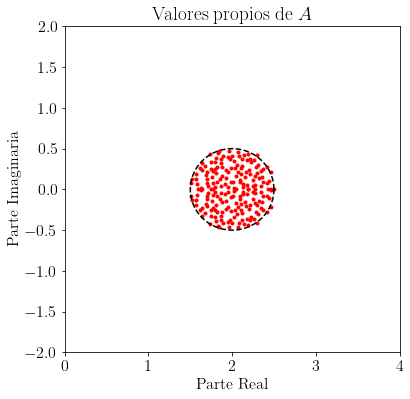

In [3]:
vals = np.linalg.eigvals(A)
t = np.linspace(0, 2*np.pi)

plt.figure(figsize=(6, 6))
plt.scatter(vals.real, vals.imag, color="red", marker=".")
plt.plot(2 + 0.5*np.cos(t), 0.5*np.sin(t), "k--")
plt.xlim(left=0, right=4)
plt.ylim(bottom=-2, top=2)
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.title("Valores propios de $A$")
plt.show()

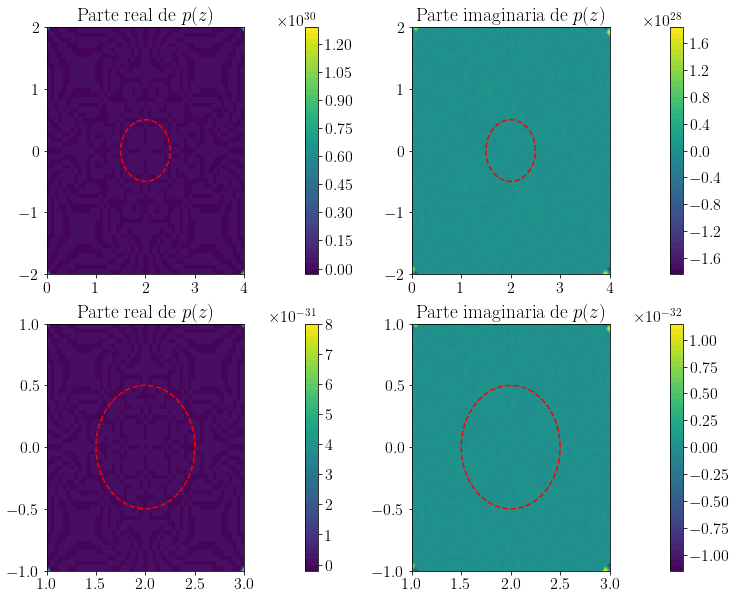

In [92]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

p = lambda z: (1 - z/2)**m 


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

# Make data.
X = np.linspace(0, 4)
Y = np.linspace(-2, 2)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
cs = ax[0, 0].contourf(X, Y, p(X+1j*Y).real, levels=50)
ax[0, 0].plot(2 + 0.5*np.cos(t), 0.5*np.sin(t), "r--")
ax[0, 0].set_title("Parte real de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[0, 0], pad=.2)

# Plot the surface.
cs = ax[0, 1].contourf(X, Y, p(X+1j*Y).imag, levels=50)
ax[0, 1].plot(2 + 0.5*np.cos(t), 0.5*np.sin(t), "r--")
ax[0, 1].set_title("Parte imaginaria de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[0, 1], pad=.2)


X = np.linspace(1, 3)
Y = np.linspace(-1, 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
cs = ax[1, 0].contourf(X, Y, p(X+1j*Y).real, levels=50)
ax[1, 0].plot(2 + 0.5*np.cos(t), 0.5*np.sin(t), "r--")
ax[1, 0].set_title("Parte real de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[1, 0], pad=.2)

cs = ax[1, 1].contourf(X, Y, p(X+1j*Y).imag, levels=50)
ax[1, 1].plot(2 + 0.5*np.cos(t), 0.5*np.sin(t), "r--")
ax[1, 1].set_title("Parte imaginaria de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[1, 1], pad=.2)

plt.show()

Arriba vemos 2 instancias del mismo gráfico de $p_n$, uno más cerca de (2, 0) y otro con más zoom hacia afuera. El que muestra más espacio tiene también una escala de valores mucho mayor, mientras que la otra rondea el 0.

In [36]:
class gmres_counter:
    
    """
    Créditos al buen Giovanni Frison que me ayudó a ver como 
    guardar la norma residual en cada iteración de gmres
    https://stackoverflow.com/questions/42228416/gmres-residual-plotting
    """
    
    def __init__(self, disp=True):
        self.niter = 0
        self.callbacks = [1]
        self._disp = disp
        
    
    def __call__(self, value):
        self.niter += 1
        self.callbacks.append(value)
        if self._disp:
            print(value)

In [37]:
b = np.ones(200, dtype=float)
counter = gmres_counter(disp=False)

x, info = gmres(A, b, callback=counter, callback_type="pr_norm")

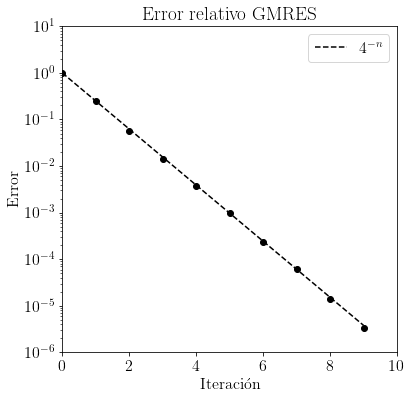

In [38]:
n = len(counter.callbacks)

plt.figure(figsize=(6, 6))
plt.plot(np.arange(n), counter.callbacks, "ko")
plt.plot(np.arange(n), (1/4)**(np.arange(n)), "k--", label="$4^{-n}$")
plt.yscale("log")
plt.legend(loc="best")
plt.xlim(left=0, right=10)
plt.ylim(top=10, bottom=1e-6)
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error relativo GMRES")
plt.show()

Por que decae tan rápido? El gráfico del espectro de $A$ muestra que todos sus valores propios están concentrados en el disco complejo de centro $2$ y radio $1/2$. Esto hace que la siguiente elección de $p$ pueda minimizar casi en todos lados $\|p\|_{\Lambda(A)}$:

$$p(z) = (1-z/2)^n$$

Así:

$$\|p(A)\| = \|(I-A/2)^ n\| \approx 4^{-n}$$

Ya que $I-A/2$ tiene entradas random centradas en $0$ de radio $1/4$.

Ahora, cómo son las matrices $A, V$ en cuanto a números de condición?

In [39]:
print(np.linalg.cond(A))
vals, V = np.linalg.eig(A)

print(np.linalg.cond(V))

2.0311938803082703
200.66027540738247


### Ejemplo 2

Tenemos ahora una matriz cuyo espectro rodea el origen.

In [40]:
def buildD(m):
    D = np.zeros((m, m), dtype=complex)
    for k in range(m):
        theta_k = k*np.pi/(m-1)
        dk = (-2 + 2*np.sin(theta_k)) + 1j*np.cos(theta_k)
        D[k, k] = dk
    return D

# Matriz para modificar
D = buildD(m)
Aprime = A + D

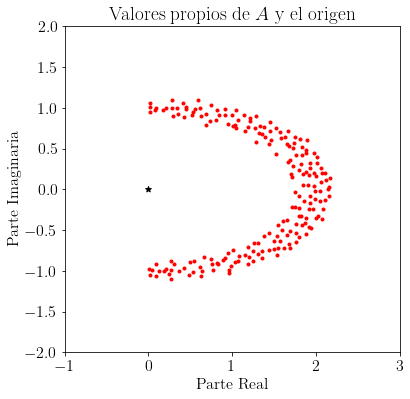

In [41]:
vals = np.linalg.eigvals(Aprime)
t = np.linspace(0, 2*np.pi)

plt.figure(figsize=(6, 6))
plt.scatter(vals.real, vals.imag, color="red", marker=".")
plt.scatter(0, 0, color="black", marker="*")
plt.xlim(left=-1, right=3)
plt.ylim(bottom=-2, top=2)
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.title("Valores propios de $A$ y el origen")
plt.show()

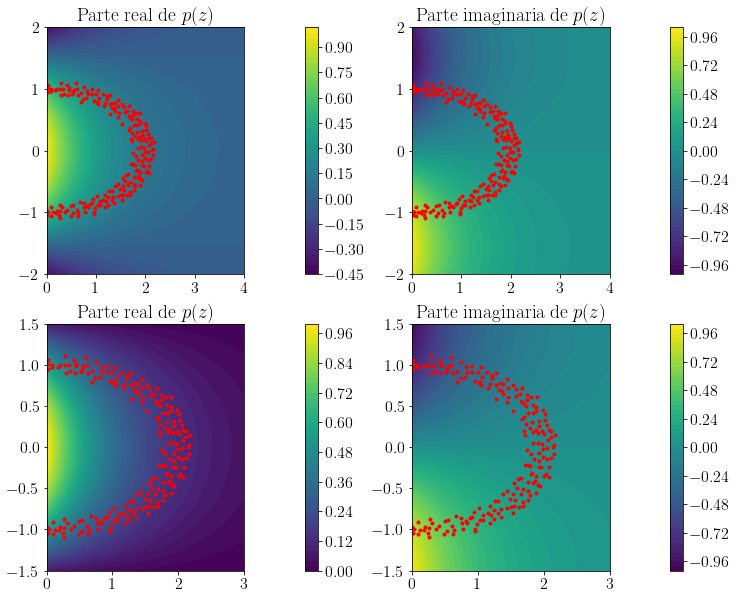

In [97]:
## No significa nada, es difícil encontrar p que hace que en todos los puntos p(z) \approx 0
p = lambda z: (1 - z/m)**m # No nos sirve algo como (z/m)^m por que p(0) != 1, que es necesario.


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

# Make data.
X = np.linspace(0, 4)
Y = np.linspace(-2, 2)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
cs = ax[0, 0].contourf(X, Y, p(X+1j*Y).real, levels=50)
ax[0, 0].scatter(vals.real, vals.imag, color="red", marker=".")
ax[0, 0].set_title("Parte real de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[0, 0], pad=.2)

# Plot the surface.
cs = ax[0, 1].contourf(X, Y, p(X+1j*Y).imag, levels=50)
ax[0, 1].scatter(vals.real, vals.imag, color="red", marker=".")
ax[0, 1].set_title("Parte imaginaria de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[0, 1], pad=.2)


X = np.linspace(0, 3)
Y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
cs = ax[1, 0].contourf(X, Y, p(X+1j*Y).real, levels=50)
ax[1, 0].scatter(vals.real, vals.imag, color="red", marker=".")
ax[1, 0].set_title("Parte real de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[1, 0], pad=.2)

cs = ax[1, 1].contourf(X, Y, p(X+1j*Y).imag, levels=50)
ax[1, 1].scatter(vals.real, vals.imag, color="red", marker=".")
ax[1, 1].set_title("Parte imaginaria de $p(z)$")

# Add a color bar which maps values to colors.
fig.colorbar(cs, ax=ax[1, 1], pad=.2)

plt.show()

In [10]:
b = np.ones(200, dtype=float)
counter = gmres_counter(disp=False)

x, info = gmres(Aprime, b, callback=counter, callback_type="pr_norm", maxiter=12)

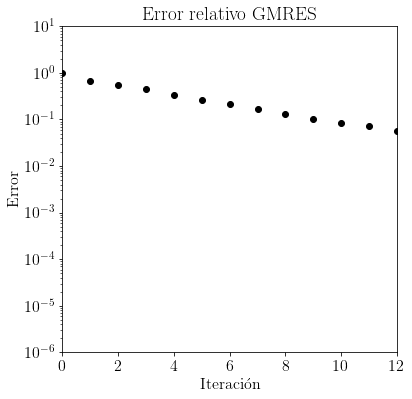

In [11]:
n = len(counter.callbacks)

plt.figure(figsize=(6, 6))
plt.plot(np.arange(n), counter.callbacks, "ko")
plt.yscale("log")
plt.xlim(left=0, right=12)
plt.ylim(top=10, bottom=1e-6)
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error relativo GMRES")
plt.show()

¿A que se debe esto? Es $A$ mal condicionada o $V$ mal condicionado?

In [12]:
print(np.linalg.cond(Aprime))
vals, V = np.linalg.eig(Aprime)

print(np.linalg.cond(V))

3.7746840709755407
59.87562519755846


¿Cómo mejoramos entonces convergencia? Buscamos un precondicionador para la matriz $A$!